In [2]:
#==================================================
# Library Import
#==================================================

import math
import argparse
import numpy as np
import pandas as pd
import scipy
from tqdm.notebook import tqdm

import torch
import torch.autograd as autograd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-l

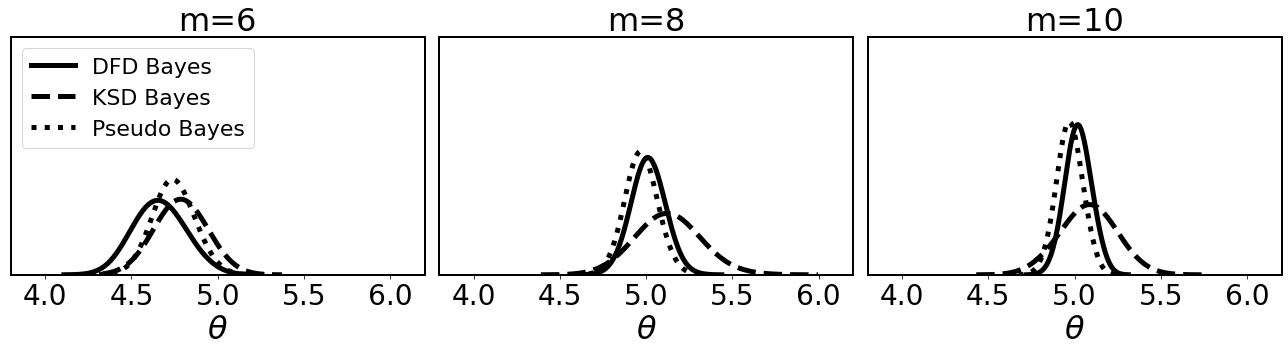

In [359]:
def ax_setting(ax, center, width, ymax=7.5):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim(center-width,center+width)
    ax.set_ylim(0, ymax)
    ax.set_xlabel(r"$\theta$", fontsize=32)
    ax.set_ylabel("")
    ax.set_yticks([])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sizes = [6, 8, 10]
for ith in range(3):
    size = str(sizes[ith])
    postsample1 = np.load("./FDBayes_size="+size+"_theta=5.0_dnum=1000_pnum=2000_samples.npy")[0,::20]
    postsample2 = np.load("./KSDBayes_size="+size+"_theta=5.0_dnum=1000_pnum=2000_samples.npy")[0,::20]
    postsample3 = np.load("./PseudoBayes_size="+size+"_theta=5.0_dnum=1000_pnum=2000_samples.npy")[0,::20]

    bw = 1.0
    sns.distplot(postsample1, ax=axs[ith], label="DFD-Bayes", kde=True, hist=False, color="black", kde_kws={"lw": 5, 'linestyle':'-', 'bw':bw})
    sns.distplot(postsample2, ax=axs[ith], label="KSD-Bayes", kde=True, hist=False, color="black", kde_kws={"lw": 5, 'linestyle':'--', 'bw':bw})
    sns.distplot(postsample3, ax=axs[ith], label="Pseudo-Bayes", kde=True, hist=False, color="black", kde_kws={"lw": 5, 'linestyle':'dotted', 'bw':bw})
    ax_setting(axs[ith], 5.0, 1.2, ymax=8.0)
    axs[ith].set_title("m="+size, fontsize=32)
    
axs[0].legend(loc=2, prop={'size': 22}, fontsize=32)
fig.tight_layout()
fig.show()
fig.savefig('../Fig/figure_8.eps', format='eps')


/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/mnt/nfs/home/b9034137/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-l

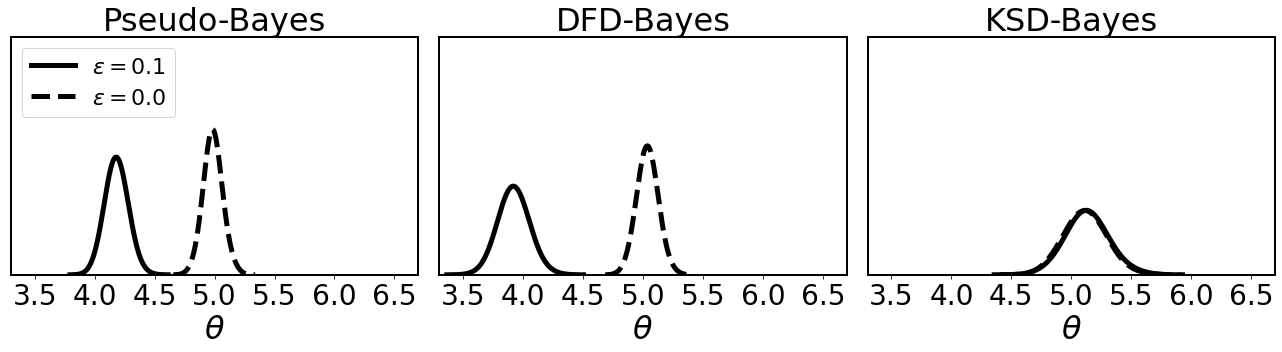

In [5]:
def ax_setting(ax, center, width, ymax=7.5):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    #ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    #ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim(center-width,center+width)
    ax.set_ylim(0, ymax)
    ax.set_xlabel(r"$\theta$", fontsize=32)
    ax.set_ylabel("")
    ax.set_yticks([])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

kind = ["PseudoBayes", "FDBayes", "RobustKSDBayes"]
title = ["Pseudo-Bayes", "DFD-Bayes", "KSD-Bayes"]
for ith in range(len(kind)):
    postsample1 = np.load("./Robust_"+kind[ith]+"_size=10_theta=5.0_dnum=1000_pnum=2000_samples_noise.npy")[0,::20]
    postsample2 = np.load("./Robust_"+kind[ith]+"_size=10_theta=5.0_dnum=1000_pnum=2000_samples_nonoise.npy")[0,::20]
    
    bw = 1.0
    sns.distplot(postsample1, ax=axs[ith], kde=True, hist=False, label=r"$\epsilon=0.1$", color="black", kde_kws={"lw": 5, 'linestyle':'-', 'bw':bw})
    sns.distplot(postsample2, ax=axs[ith], kde=True, hist=False, label=r"$\epsilon=0.0$", color="black", kde_kws={"lw": 5, 'linestyle':'--', 'bw':bw})
    ax_setting(axs[ith], 5.0, 1.7, ymax=8.0)
    axs[ith].set_title(title[ith], fontsize=32)
    
axs[0].legend(loc=2, prop={'size': 22}, fontsize=32)
fig.tight_layout()
fig.show()
fig.savefig('../Fig/figure_12.eps', format='eps')
